In [193]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [194]:
train_data = pd.read_csv(os.path.join("data", "train.csv"), header=0).set_index("PassengerId")
test_data = pd.read_csv(os.path.join("data", "test.csv"), header=0).set_index("PassengerId")

In [195]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

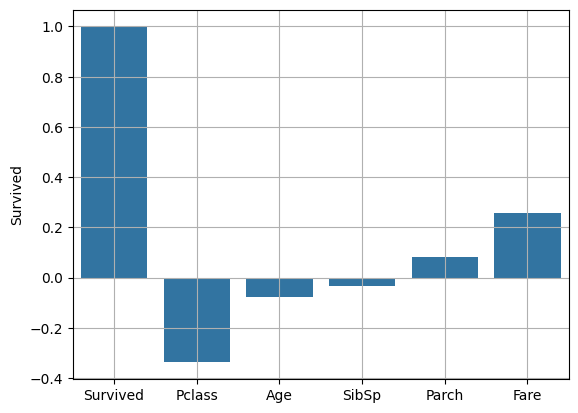

In [196]:
sns.barplot(train_data.corr(numeric_only=True)["Survived"])
plt.grid()

#### Survived, Pclass Age SibSp, Parch, Fareは数字データ
#### Name, Sex, Ticket, Cabin, Embarkedはほかのデータ型

In [197]:
train_data["Sex"]

PassengerId
1        male
2      female
3      female
4      female
5        male
        ...  
887      male
888    female
889    female
890      male
891      male
Name: Sex, Length: 891, dtype: object

In [198]:
train_data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [199]:
train_data["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

# CabinはU(unknown)でfillnaしました

<Axes: xlabel='Cabin', ylabel='Survived'>

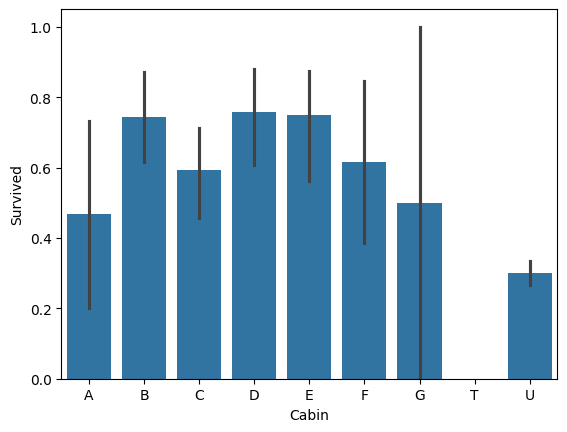

In [200]:
train_data["Cabin"] = train_data["Cabin"].str.get(0)
train_data["Cabin"] = train_data["Cabin"].fillna("U")
sns.barplot(train_data.sort_values("Cabin"), x="Cabin", y="Survived")

## Age自体をfillnaするためのモデルを作りたい

<Axes: xlabel='Age', ylabel='Survived'>

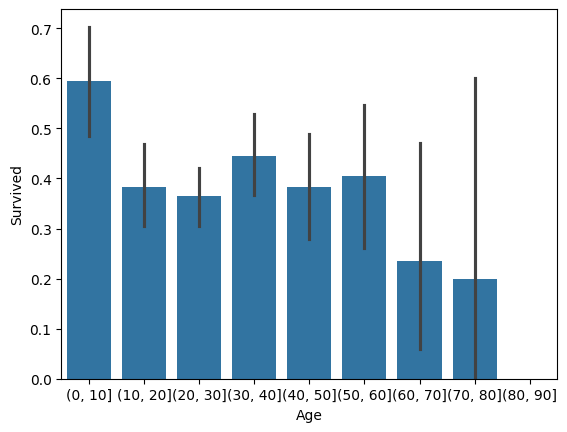

In [201]:
sns.barplot(x=pd.cut(train_data["Age"], bins=np.arange(0, 100, 10)), y=train_data["Survived"])

In [202]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U,S


# NameをMrやMrsで位を分けるようにする、SibSp, Parch, Fare, TicketがどのようにSurvivedに関連付くかを調べる

## とりあえずLogisticRegression()で推論を行ってみる。その後にRandomForestを使ってみる、その際にはone-hot vectorをしないようにする

In [203]:
train_data["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='Survived'>

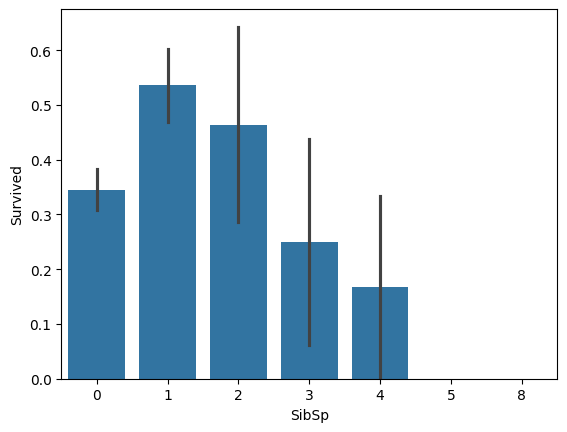

In [204]:
sns.barplot(data=train_data, x="SibSp", y="Survived")

<Axes: xlabel='Parch', ylabel='Survived'>

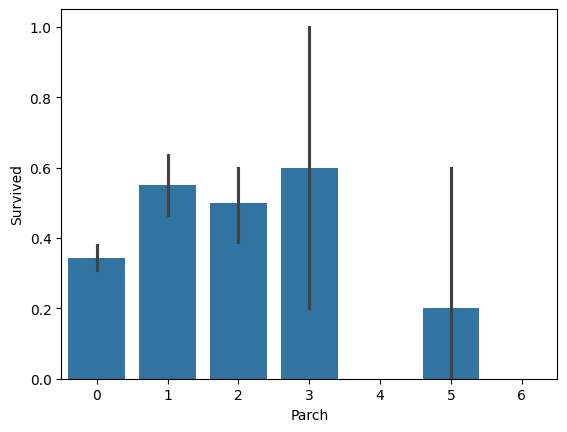

In [205]:
sns.barplot(data=train_data, x="Parch", y="Survived")

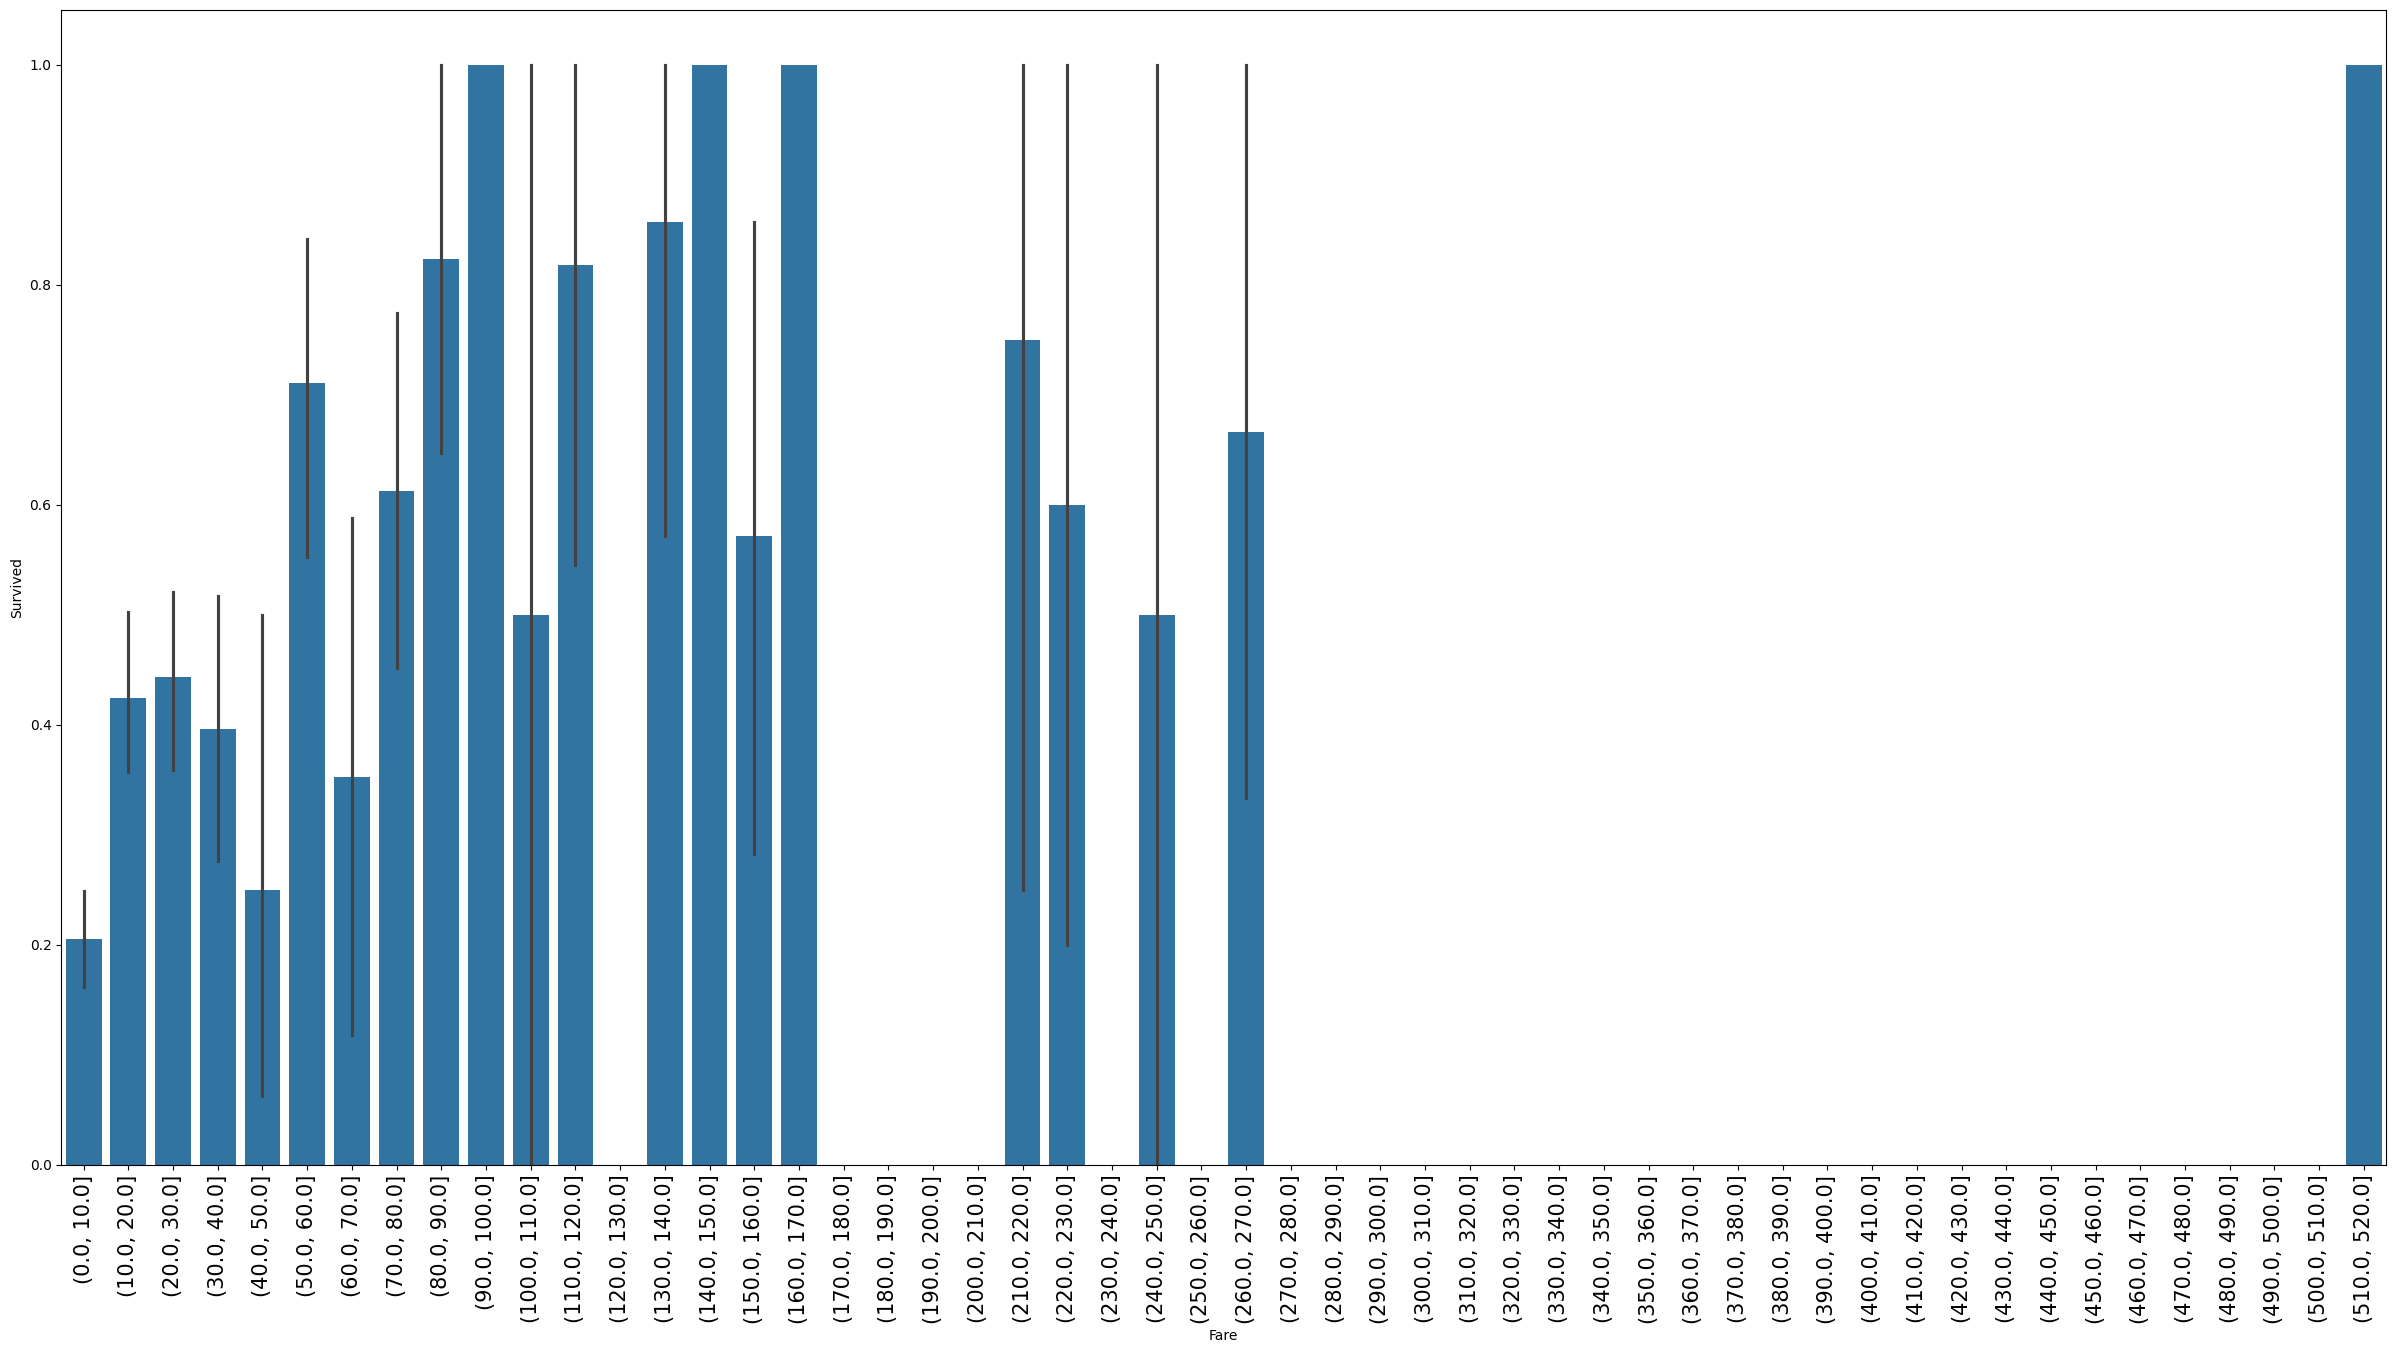

In [206]:
plt.figure(figsize=(30, 15))
sns.barplot(x=pd.cut(train_data["Fare"], bins=np.arange(0, (np.max(train_data["Fare"] + 10)), 10)), y=train_data["Survived"])
plt.xticks(rotation=90, fontsize=15)
plt.show()

X_train, y_train = train_data.drop(["Name", "Survived", "Ticket"], axis=1), train_data["Survived"]

X_train["Age"] = X_train["Age"].fillna(X_train["Age"].mean())

print(X_train.isna().sum())

print(y_train.isna().sum())

param_grid = {"logisticregression__C": 10.0 ** np.arange(-3, 5),}

grid_logreg = GridSearchCV(pipe_logreg, param_grid=param_grid, cv=10)

grid_logreg.fit(X_train, y_train)


print("Best cross-validation score", grid_logreg.best_score_)
print("Best param", grid_logreg.best_params_)

### Best cross-validation score 0.8058551810237203
### Best param {'logisticregression__C': np.float64(10.0)}

In [207]:
train_data["Age"].notna().sum()

np.int64(714)

In [208]:
train_data["Age"].isna()

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [209]:
train_data["Honorifics"] = train_data["Name"].str.extract(r",\s*([A-Za-z]+)\.")

hono_dict = {}
hono_dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
hono_dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
hono_dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
hono_dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
hono_dict.update(dict.fromkeys(['Mr'], 'Mr'))
hono_dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
train_data["Honorifics"] = train_data["Honorifics"].map(hono_dict)

In [210]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorifics
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S,Officer
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U,S,Miss


### Sex, Cabin, Embarked, Pclass, Honorificsをone-hot vector化

In [211]:
train_data = pd.get_dummies(train_data, columns=["Sex", "Cabin", "Embarked", "Honorifics"])

#### Age列のnaでない列をnona_Ageに

In [212]:
age_na_idx = train_data["Age"].isna()
nona_Age = train_data[train_data["Age"].notna()]
X_age_train, y_age_train = nona_Age.drop(["Name", "Ticket", "Age"], axis=1), nona_Age["Age"]

In [213]:
X_age_train

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Honorifics_Master,Honorifics_Miss,Honorifics_Mr,Honorifics_Mrs,Honorifics_Officer,Honorifics_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,0,7.2500,False,True,False,False,False,...,True,False,False,True,False,False,True,False,False,False
2,1,1,1,0,71.2833,True,False,False,False,True,...,False,True,False,False,False,False,False,True,False,False
3,1,3,0,0,7.9250,True,False,False,False,False,...,True,False,False,True,False,True,False,False,False,False
4,1,1,1,0,53.1000,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
5,0,3,0,0,8.0500,False,True,False,False,False,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,0,5,29.1250,True,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
887,0,2,0,0,13.0000,False,True,False,False,False,...,True,False,False,True,False,False,False,False,True,False
888,1,1,0,0,30.0000,True,False,False,True,False,...,False,False,False,True,False,True,False,False,False,False


In [214]:
pipe_logreg = make_pipeline(
    StandardScaler(),
    SVR()
)

param_grid = {"svr__C": [5, 10, 15],
              "svr__gamma": [0.05, 0.1, 0.15]}

grid_logreg = GridSearchCV(pipe_logreg, param_grid, cv=10)
grid_logreg.fit(X_age_train, y_age_train)

print(grid_logreg.best_score_)
print(grid_logreg.best_params_)

0.32695858937218614
{'svr__C': 15, 'svr__gamma': 0.05}


In [215]:
pipe_rf = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

param_grid_rf = {"randomforestregressor__n_estimators": [600, 700, 800, 1000],
                 "randomforestregressor__max_depth": [5, 6, 7, 8],
                 "randomforestregressor__min_samples_leaf": [4, 5, 6, 7, 8],
                 "randomforestregressor__max_features": [0.4, 0.5, 0.6]}

grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=10, n_jobs=-1)
grid_rf.fit(X_age_train, y_age_train)

print(grid_rf.best_score_)
print(grid_rf.best_params_)

0.4151965293521802
{'randomforestregressor__max_depth': 7, 'randomforestregressor__max_features': 0.5, 'randomforestregressor__min_samples_leaf': 5, 'randomforestregressor__n_estimators': 600}


In [216]:
train_data[age_na_idx]

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,...,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Honorifics_Master,Honorifics_Miss,Honorifics_Mr,Honorifics_Mrs,Honorifics_Officer,Honorifics_Royalty
PassengerId,,,,,,,,,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,False,True,...,True,False,True,False,False,False,True,False,False,False
18,1,2,"Williams, Mr. Charles Eugene",NaN,0,0,244373,13.0000,False,True,...,True,False,False,True,False,False,True,False,False,False
20,1,3,"Masselmani, Mrs. Fatima",NaN,0,0,2649,7.2250,True,False,...,True,True,False,False,False,False,False,True,False,False
27,0,3,"Emir, Mr. Farred Chehab",NaN,0,0,2631,7.2250,False,True,...,True,True,False,False,False,False,True,False,False,False
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0,0,330959,7.8792,True,False,...,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",NaN,0,0,2629,7.2292,False,True,...,True,True,False,False,False,False,True,False,False,False
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,8,2,CA. 2343,69.5500,True,False,...,True,False,False,True,False,True,False,False,False,False
869,0,3,"van Melkebeke, Mr. Philemon",NaN,0,0,345777,9.5000,False,True,...,True,False,False,True,False,False,True,False,False,False


In [217]:
train_data.loc[age_na_idx, "Age"] = grid_rf.predict(train_data[age_na_idx].drop(["Name", "Ticket", "Age"], axis=1))
